In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

from datetime import datetime

In [2]:
df = pd.read_spss("./promoted.sav")
df

CUSTID         DOB  GENDER ADDRESS EMAIL      LCDate       EDate  \
0     0000002771  1949-02-16  Others     Yes    No  2018-11-07  2022-12-31   
1     0000004529  1959-03-07    Male     Yes    No  2018-06-29  2022-12-31   
2     0000011207  1966-05-03    Male     Yes    No  2020-05-23  2022-12-31   
3     0000019763  1946-03-24  Female     Yes    No  2019-11-19  2022-12-31   
4     0000046906         NaN  Female     Yes   Yes  2020-11-12  2022-12-31   
...          ...         ...     ...     ...   ...         ...         ...   
1839  0052732018  1979-03-29  Female     Yes    No  2016-09-01  2022-12-31   
1840  0052745187  1973-02-13  Female     Yes    No  2019-12-02  2022-12-31   
1841  0052758092  1958-09-11  Female     Yes    No  2019-04-02  2022-12-31   
1842  0052780250  1980-06-01    Male     Yes    No  2014-01-29  2022-12-31   
1843  0052829143  1986-11-13    Male     Yes    No  2013-06-01  2022-12-31   

     NGROUP      REGION     CLASS  AFFL RESPONSE  
0         D       North  Platinum   9.0       No  
1         F    Midlands    Silver  10.0       No  
2         D    Midlands    Silver   8.0       No  
3         B    Midlands      Gold   9.0       No  
4         F       North    Silver   7.0       No  
...     ...         ...       ...   ...      ...  
1839      E    Midlands    Silver   3.0       No  
1840      F    Midlands      Gold  12.0       No  
1841      A  South East    Silver   9.0      Yes  
1842      F       North    Silver  11.0       No  
1843      B  South East       Tin   7.0      Yes  

[1844 rows x 12 columns]

In [3]:
df.isnull().sum()

CUSTID       0
DOB         15
GENDER       6
ADDRESS      0
EMAIL        0
LCDate      25
EDate        0
NGROUP       0
REGION       0
CLASS        0
AFFL         0
RESPONSE     0
dtype: int64

In [4]:
df['LYEARS'] = (df['EDate'] - df['LCDate']) / np.timedelta64(1, 'Y')
df['AGE'] = (df['EDate'] - df['DOB']) / np.timedelta64(1, 'Y')

In [5]:
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LYEARS'] = df['LYEARS'].fillna(df['LYEARS'].mean())
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode().iloc[0])
df

CUSTID         DOB  GENDER ADDRESS EMAIL      LCDate       EDate  \
0     0000002771  1949-02-16  Others     Yes    No  2018-11-07  2022-12-31   
1     0000004529  1959-03-07    Male     Yes    No  2018-06-29  2022-12-31   
2     0000011207  1966-05-03    Male     Yes    No  2020-05-23  2022-12-31   
3     0000019763  1946-03-24  Female     Yes    No  2019-11-19  2022-12-31   
4     0000046906         NaN  Female     Yes   Yes  2020-11-12  2022-12-31   
...          ...         ...     ...     ...   ...         ...         ...   
1839  0052732018  1979-03-29  Female     Yes    No  2016-09-01  2022-12-31   
1840  0052745187  1973-02-13  Female     Yes    No  2019-12-02  2022-12-31   
1841  0052758092  1958-09-11  Female     Yes    No  2019-04-02  2022-12-31   
1842  0052780250  1980-06-01    Male     Yes    No  2014-01-29  2022-12-31   
1843  0052829143  1986-11-13    Male     Yes    No  2013-06-01  2022-12-31   

     NGROUP      REGION     CLASS  AFFL RESPONSE    LYEARS        AGE  
0         D       North  Platinum   9.0       No  4.147929  73.871469  
1         F    Midlands    Silver  10.0       No  4.506595  63.820612  
2         D    Midlands    Silver   8.0       No  2.606487  56.663723  
3         B    Midlands      Gold   9.0       No  3.115738  76.773650  
4         F       North    Silver   7.0       No  2.132830  56.188131  
...     ...         ...       ...   ...      ...       ...        ...  
1839      E    Midlands    Silver   3.0       No  6.330041  43.759968  
1840      F    Midlands      Gold  12.0       No  3.080145  49.879190  
1841      A  South East    Silver   9.0      Yes  3.748195  64.305222  
1842      F       North    Silver  11.0       No  8.920101  42.582668  
1843      B  South East       Tin   7.0      Yes  9.582675  36.132159  

[1844 rows x 14 columns]

In [6]:
df.isnull().sum()

CUSTID       0
DOB         15
GENDER       0
ADDRESS      0
EMAIL        0
LCDate      25
EDate        0
NGROUP       0
REGION       0
CLASS        0
AFFL         0
RESPONSE     0
LYEARS       0
AGE          0
dtype: int64

#### DF with Missing Values Removed and Column Tranformation

In [7]:
df = df[['AGE', 'LYEARS', 'AFFL', 'CLASS', 'REGION', 'NGROUP', 'EMAIL', 'GENDER', 'RESPONSE']].copy()
df

AGE    LYEARS  AFFL     CLASS      REGION NGROUP EMAIL  GENDER  \
0     73.871469  4.147929   9.0  Platinum       North      D    No  Others   
1     63.820612  4.506595  10.0    Silver    Midlands      F    No    Male   
2     56.663723  2.606487   8.0    Silver    Midlands      D    No    Male   
3     76.773650  3.115738   9.0      Gold    Midlands      B    No  Female   
4     56.188131  2.132830   7.0    Silver       North      F   Yes  Female   
...         ...       ...   ...       ...         ...    ...   ...     ...   
1839  43.759968  6.330041   3.0    Silver    Midlands      E    No  Female   
1840  49.879190  3.080145  12.0      Gold    Midlands      F    No  Female   
1841  64.305222  3.748195   9.0    Silver  South East      A    No  Female   
1842  42.582668  8.920101  11.0    Silver       North      F    No    Male   
1843  36.132159  9.582675   7.0       Tin  South East      B    No    Male   

     RESPONSE  
0          No  
1          No  
2          No  
3          No  
4          No  
...       ...  
1839       No  
1840       No  
1841      Yes  
1842       No  
1843      Yes  

[1844 rows x 9 columns]

In [8]:
df.isnull().sum()

AGE         0
LYEARS      0
AFFL        0
CLASS       0
REGION      0
NGROUP      0
EMAIL       0
GENDER      0
RESPONSE    0
dtype: int64

In [9]:
df.dtypes

AGE          float64
LYEARS       float64
AFFL        category
CLASS       category
REGION      category
NGROUP      category
EMAIL       category
GENDER      category
RESPONSE    category
dtype: object

In [10]:
def plotProbDis(df, x):
    fig = px.histogram(df, x=x,  color="RESPONSE",
                   marginal="violin"
                  )
    fig.show()
    
def minmax(x):
    min_value = df[x].min()
    max_value = df[x].max()

    print(min_value, max_value)

In [11]:
df.AFFL.unique

<bound method Series.unique of 0        9.0
1       10.0
2        8.0
3        9.0
4        7.0
        ... 
1839     3.0
1840    12.0
1841     9.0
1842    11.0
1843     7.0
Name: AFFL, Length: 1844, dtype: category
Categories (28, object): [2.0, 3.0, 4.0, 5.0, ..., 27.0, 29.0, '1 - Lowest affluence grade', '30 - Highest affluence grade']>

#### Convert AFFL to integer type

In [12]:
df['AFFL'] = df['AFFL'].replace('30 - Highest affluence grade', '30')
df['AFFL'] = df['AFFL'].replace('1 - Lowest affluence grade', '1')

df['AFFL'] = pd.to_numeric(df['AFFL'], errors='coerce', downcast='integer')
print(df.dtypes)

AGE          float64
LYEARS       float64
AFFL            int8
CLASS       category
REGION      category
NGROUP      category
EMAIL       category
GENDER      category
RESPONSE    category
dtype: object


In [13]:
df.AFFL.unique()

array([ 9, 10,  8,  7,  6, 11,  4, 20, 13,  5, 26, 18, 12, 15, 14, 17, 16,
        3,  2, 24, 19, 29, 21, 30, 22, 27,  1, 23], dtype=int8)

In [14]:
minmax('AGE')

22.155143500551002 81.62522159934838


#### Numerical Probability Distributions 

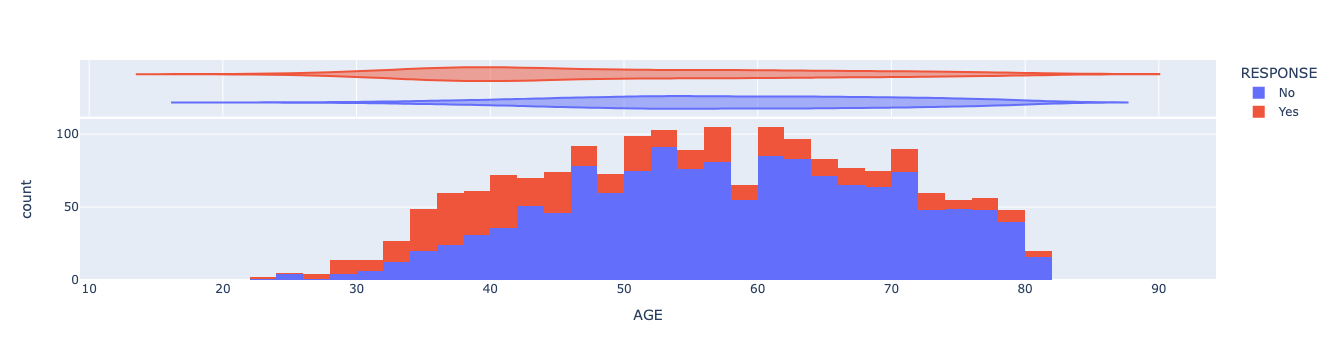

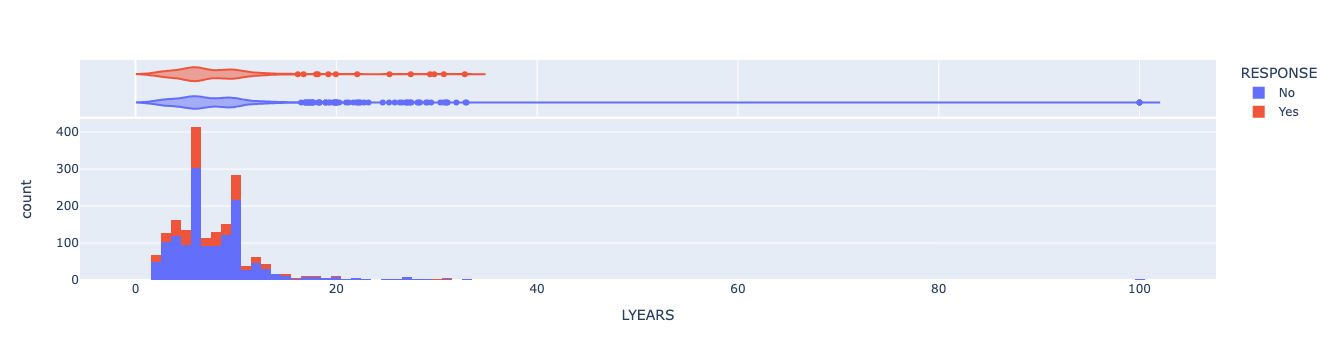

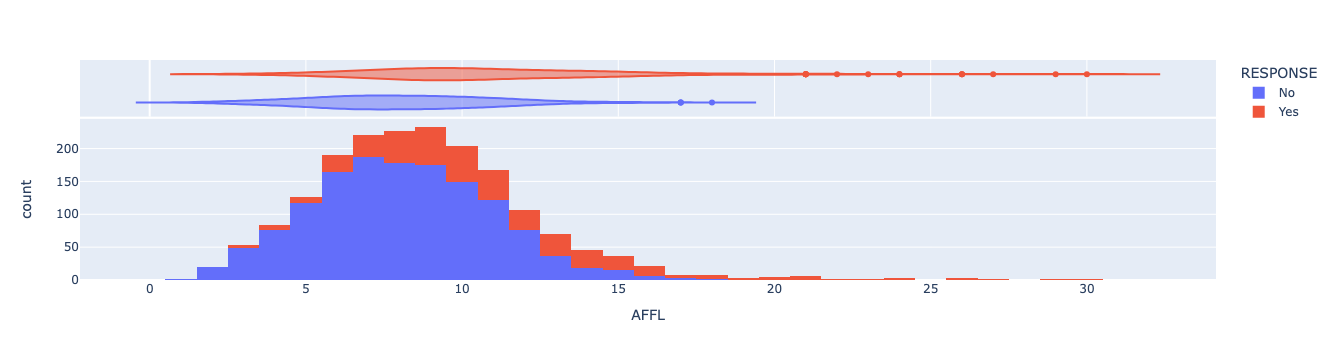

In [15]:
plotProbDis(df, 'AGE')
plotProbDis(df, 'LYEARS')
plotProbDis(df, 'AFFL')

#### Outliers for Numerical Variables

In [16]:
# IQR Method
Q1 = df[['AGE', 'LYEARS']].quantile(0.25)
Q3 = df[['AGE', 'LYEARS']].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[['AGE', 'LYEARS']] < (Q1 - 1.5 * IQR)) | (df[['AGE', 'LYEARS']] > (Q3 + 1.5 * IQR)))
count_outliers_iqr = outliers_iqr.sum()
count_outliers_iqr

AGE        0
LYEARS    84
dtype: int64

In [17]:
from scipy import stats

def zscore(threshold):
    z_scores = stats.zscore(df[['LYEARS', 'AGE']])
    threshold = threshold

    outliers_zscore = (z_scores > threshold) | (z_scores < -threshold)

    count_outliers_zscore = outliers_zscore.sum()
    print(count_outliers_zscore)

LYEARS    30
AGE        0
dtype: int64
LYEARS    7
AGE       0
dtype: int64
LYEARS    4
AGE       0
dtype: int64


In [18]:
z_scores = stats.zscore(df[['LYEARS', 'AGE']])

outliers_zscore_t5 = (z_scores > 5) | (z_scores < -5)
outliers_zscore_t4 = (z_scores > 4) | (z_scores < -4)

print(outliers_zscore_t5.query('LYEARS == True').index)
print(outliers_zscore_t4.query('LYEARS == True').index)

Int64Index([175, 417, 1425, 1704], dtype='int64')
Int64Index([69, 175, 417, 779, 1033, 1425, 1704], dtype='int64')


In [19]:
# Inspect values at Z-Score of 4 - there are only 4 values with 99 so we will use the higher Z-score of 5 to remove extreme values
indices_to_query = [69, 175, 417, 779, 1033, 1425, 1704]
result = df.query('index in @indices_to_query')
result

AGE     LYEARS  AFFL     CLASS      REGION NGROUP EMAIL  GENDER  \
69    79.385614  32.969876     6      Gold    Midlands      E    No  Female   
175   69.666044  99.999316    12  Platinum    Midlands      E    No  Others   
417   78.983141  99.999316     5    Silver  South East      B    No  Female   
779   75.741459  32.876787    11      Gold       North      C    No  Others   
1033  57.550805  32.800126    10    Silver    Midlands      B    No  Female   
1425  78.419132  99.999316     9    Silver  South East      C    No  Others   
1704  51.992854  99.999316     7      Gold    Midlands      F    No  Female   

     RESPONSE  
69         No  
175        No  
417        No  
779        No  
1033      Yes  
1425       No  
1704       No

In [20]:
df = df[~outliers_zscore_t5.any(axis=1)]
df

AGE    LYEARS  AFFL     CLASS      REGION NGROUP EMAIL  GENDER  \
0     73.871469  4.147929     9  Platinum       North      D    No  Others   
1     63.820612  4.506595    10    Silver    Midlands      F    No    Male   
2     56.663723  2.606487     8    Silver    Midlands      D    No    Male   
3     76.773650  3.115738     9      Gold    Midlands      B    No  Female   
4     56.188131  2.132830     7    Silver       North      F   Yes  Female   
...         ...       ...   ...       ...         ...    ...   ...     ...   
1839  43.759968  6.330041     3    Silver    Midlands      E    No  Female   
1840  49.879190  3.080145    12      Gold    Midlands      F    No  Female   
1841  64.305222  3.748195     9    Silver  South East      A    No  Female   
1842  42.582668  8.920101    11    Silver       North      F    No    Male   
1843  36.132159  9.582675     7       Tin  South East      B    No    Male   

     RESPONSE  
0          No  
1          No  
2          No  
3          No  
4          No  
...       ...  
1839       No  
1840       No  
1841      Yes  
1842       No  
1843      Yes  

[1840 rows x 9 columns]

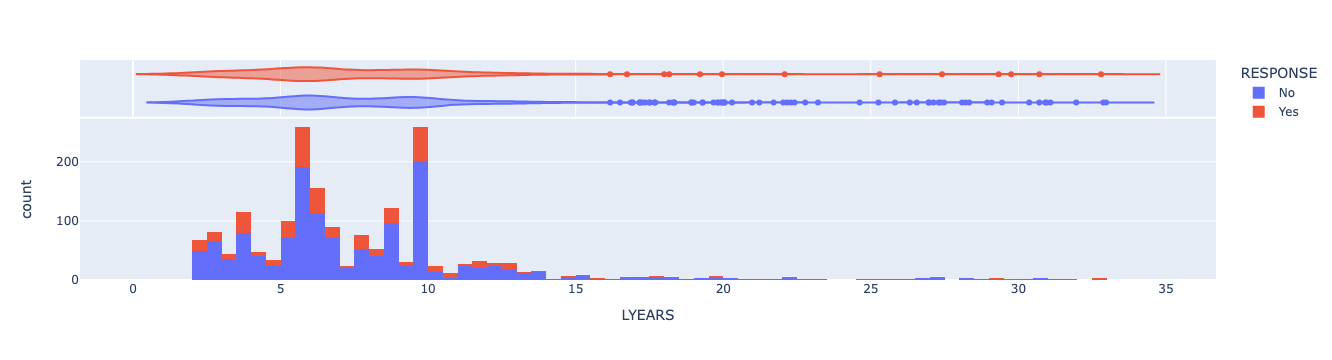

2.0944988603462082 32.96987617815561


In [21]:
plotProbDis(df, 'LYEARS')
minmax('LYEARS')

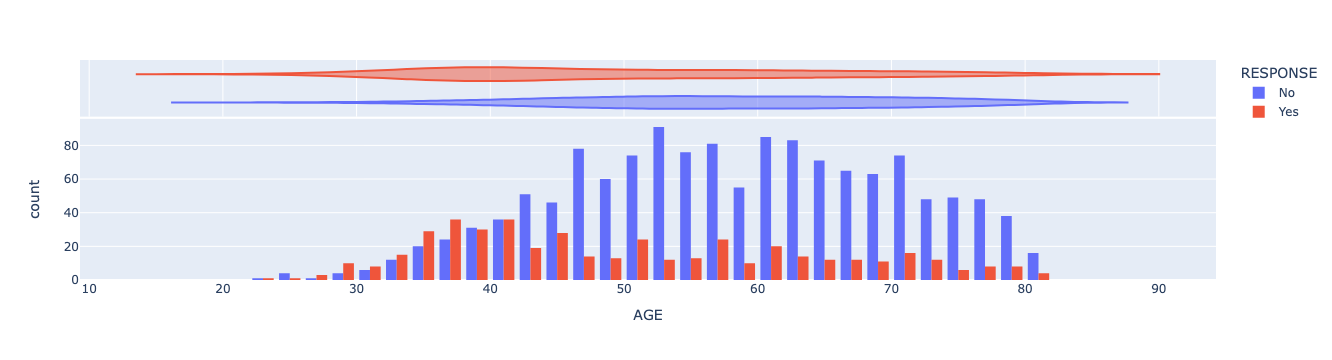

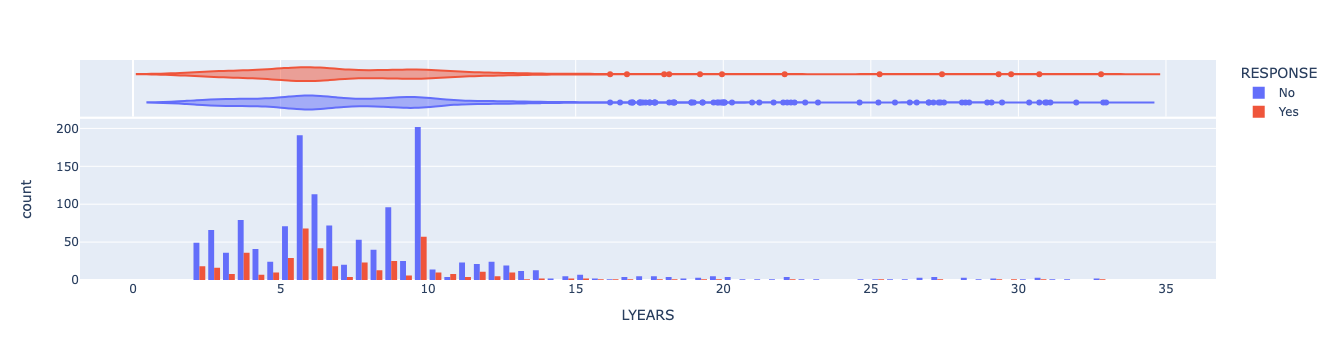

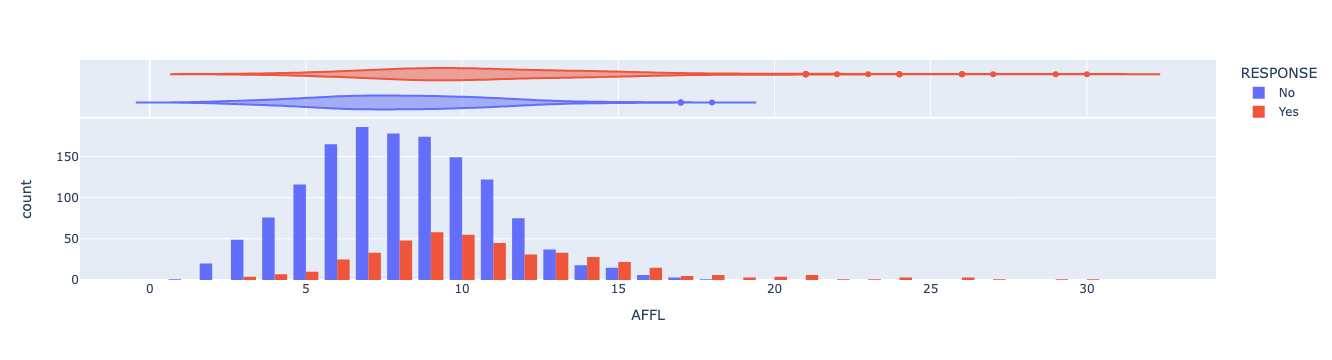

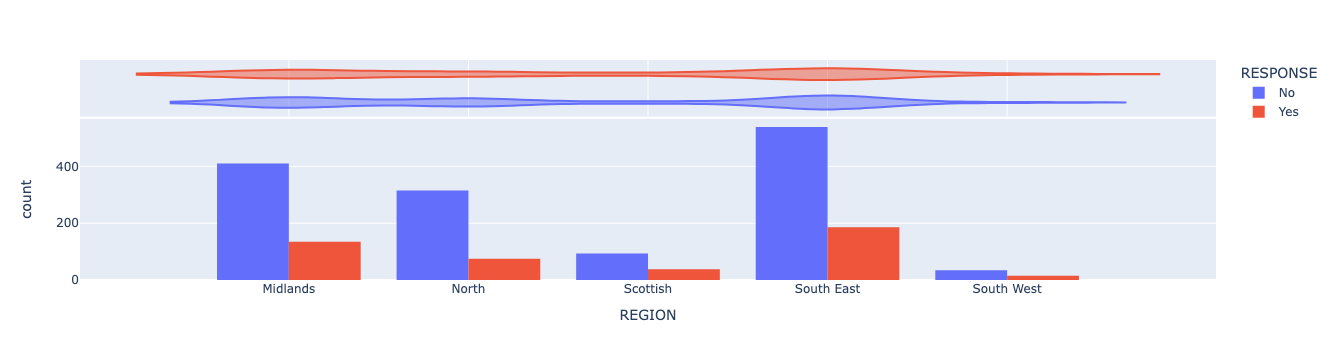

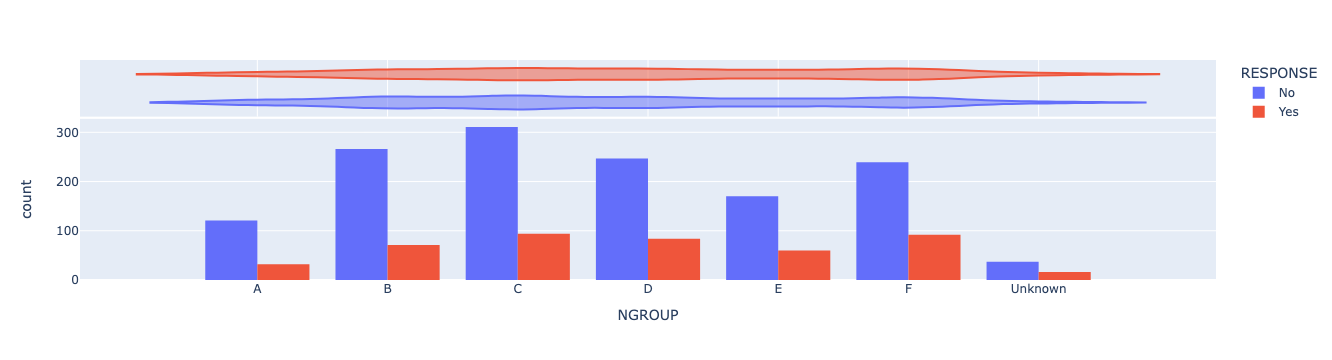

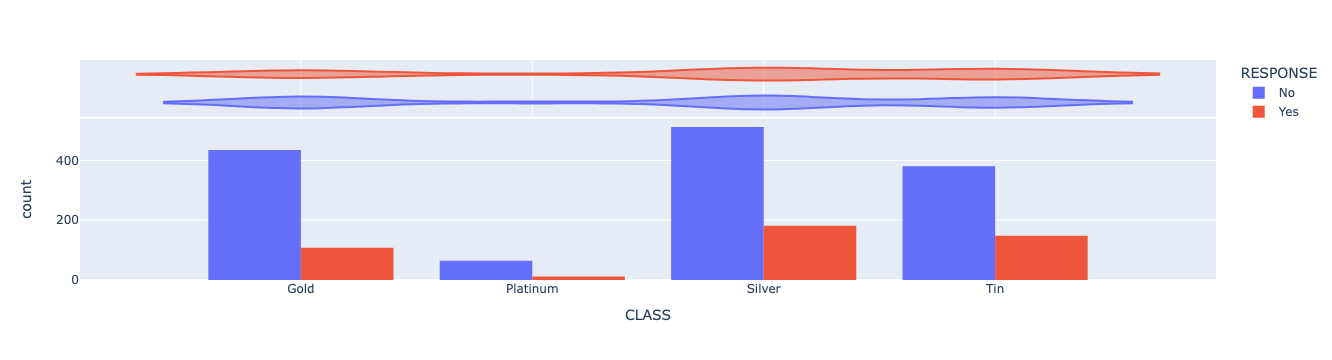

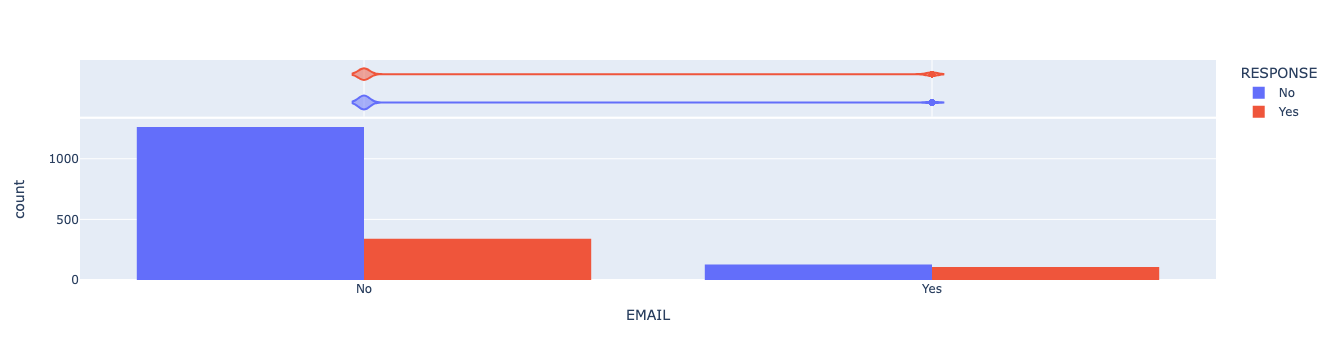

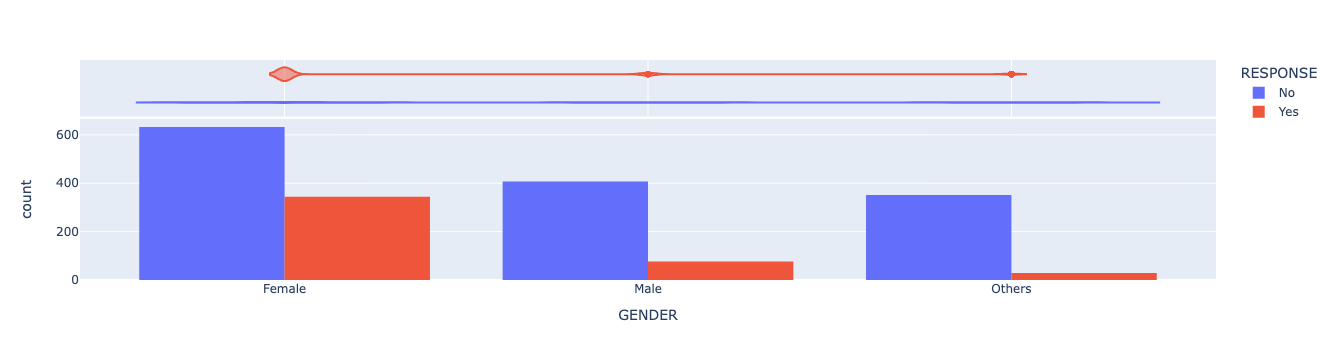

In [22]:
import plotly.express as px

def plotProbDisWithOrder(df, x):
    # sort by alphabetical order
    sorted_categories = df[x].sort_values().unique()
    
    fig = px.histogram(df, x=x, color="RESPONSE", marginal="violin", barmode='group')
    
    fig.update_xaxes(categoryorder='array', categoryarray=sorted_categories)
    
    fig.show()

plotProbDisWithOrder(df, 'AGE')
plotProbDisWithOrder(df, 'LYEARS')
plotProbDisWithOrder(df, 'AFFL')
plotProbDisWithOrder(df, 'REGION')
plotProbDisWithOrder(df, 'NGROUP')
plotProbDisWithOrder(df, 'CLASS')
plotProbDisWithOrder(df, 'EMAIL')
plotProbDisWithOrder(df, 'GENDER')

In [23]:
def calculate_mean_mode_std(df):
    stats_dict = {}
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Numeric columns
            mean = df[column].mean()
            mode = df[column].mode()[0]  # Mode could be multi-modal
            std = df[column].std()  # Calculating standard deviation
            stats_dict[column] = {'mean': mean, 'mode': mode, 'std': std}
        else:  # Categorical columns
            mode = df[column].mode()[0]  # Mode for categorical columns
            stats_dict[column] = {'mode': mode}
    return stats_dict

# Example usage:
# df = pd.read_csv('your

# Example usage:
# df = pd.read_csv('your_data.csv')
# result = calculate_mean_mode(df)
# print(result)

print(calculate_mean_mode_std(df))

{'AGE': {'mean': 56.15861588689278, 'mode': 56.18813145529828, 'std': 13.003951064026465}, 'LYEARS': {'mean': 7.766381507356345, 'mode': 9.582674524459776, 'std': 4.419356542758178}, 'AFFL': {'mode': 9}, 'CLASS': {'mode': 'Silver'}, 'REGION': {'mode': 'South East'}, 'NGROUP': {'mode': 'C'}, 'EMAIL': {'mode': 'No'}, 'GENDER': {'mode': 'Female'}, 'RESPONSE': {'mode': 'No'}}


In [24]:
df_yes = df[df['RESPONSE'] == 'Yes']
df_no = df[df['RESPONSE'] == 'No']

In [25]:
print(calculate_mean_mode_std(df_no))

{'AGE': {'mean': 58.07779477284576, 'mode': 56.18813145529828, 'std': 12.10904828291948}, 'LYEARS': {'mean': 7.84604972068705, 'mode': 9.582674524459776, 'std': 4.525098506331945}, 'AFFL': {'mode': 7}, 'CLASS': {'mode': 'Silver'}, 'REGION': {'mode': 'South East'}, 'NGROUP': {'mode': 'C'}, 'EMAIL': {'mode': 'No'}, 'GENDER': {'mode': 'Female'}, 'RESPONSE': {'mode': 'No'}}


In [26]:
print(calculate_mean_mode_std(df_yes))

{'AGE': {'mean': 50.21300824689145, 'mode': 56.18813145529828, 'std': 13.86879729370426}, 'LYEARS': {'mean': 7.519569737327371, 'mode': 9.582674524459776, 'std': 4.069277832373972}, 'AFFL': {'mode': 9}, 'CLASS': {'mode': 'Silver'}, 'REGION': {'mode': 'South East'}, 'NGROUP': {'mode': 'C'}, 'EMAIL': {'mode': 'No'}, 'GENDER': {'mode': 'Female'}, 'RESPONSE': {'mode': 'Yes'}}


In [27]:
def responseRate(col):
    response_rate = df.groupby(col)['RESPONSE'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    response_rate_df = response_rate.reset_index(name='Response Rate (%)')
    return response_rate_df
    
responseRate('REGION')

REGION  Response Rate (%)
0    Midlands          24.770642
1       North          19.230769
2    Scottish          29.007634
3  South East          25.655172
4  South West          30.612245

In [28]:
responseRate('NGROUP')

NGROUP  Response Rate (%)
0        A          20.915033
1        B          21.068249
2        C          23.209877
3        D          25.377644
4        E          26.086957
5        F          27.794562
6  Unknown          30.188679

In [29]:
responseRate('CLASS')

CLASS  Response Rate (%)
0      Gold          19.889503
1  Platinum          15.789474
2    Silver          26.118326
3       Tin          28.030303

In [30]:
responseRate('EMAIL')

EMAIL  Response Rate (%)
0    No          21.259352
1   Yes          45.762712

In [31]:
responseRate('GENDER')

GENDER  Response Rate (%)
0  Female          35.209826
1    Male          15.734990
2  Others           7.631579

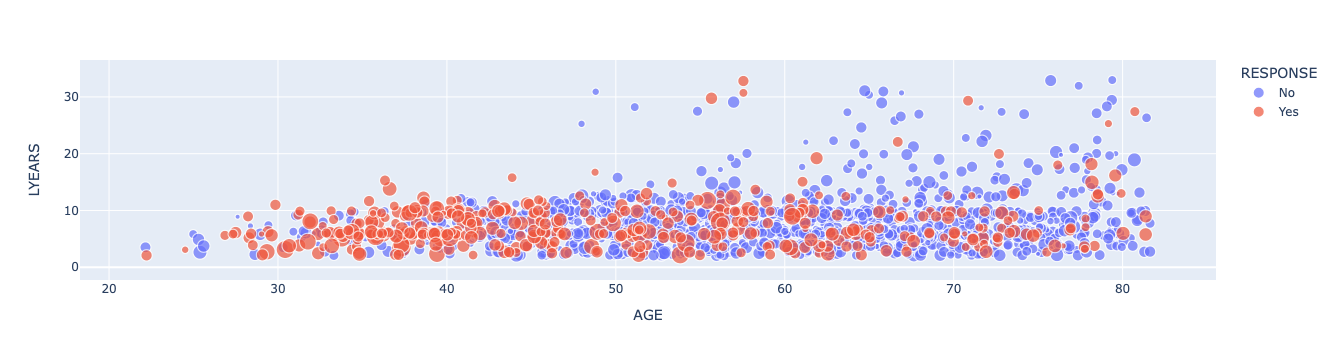

In [32]:
import plotly.graph_objs as go

import plotly.express as px
fig = px.scatter(df, x="AGE", y="LYEARS", color="RESPONSE", size="AFFL"
                 )
fig.show()


In [33]:
df

AGE    LYEARS  AFFL     CLASS      REGION NGROUP EMAIL  GENDER  \
0     73.871469  4.147929     9  Platinum       North      D    No  Others   
1     63.820612  4.506595    10    Silver    Midlands      F    No    Male   
2     56.663723  2.606487     8    Silver    Midlands      D    No    Male   
3     76.773650  3.115738     9      Gold    Midlands      B    No  Female   
4     56.188131  2.132830     7    Silver       North      F   Yes  Female   
...         ...       ...   ...       ...         ...    ...   ...     ...   
1839  43.759968  6.330041     3    Silver    Midlands      E    No  Female   
1840  49.879190  3.080145    12      Gold    Midlands      F    No  Female   
1841  64.305222  3.748195     9    Silver  South East      A    No  Female   
1842  42.582668  8.920101    11    Silver       North      F    No    Male   
1843  36.132159  9.582675     7       Tin  South East      B    No    Male   

     RESPONSE  
0          No  
1          No  
2          No  
3          No  
4          No  
...       ...  
1839       No  
1840       No  
1841      Yes  
1842       No  
1843      Yes  

[1840 rows x 9 columns]

In [34]:
ordinal_class_mapping = {'Gold': 3, 'Platinum': 4, 'Silver': 2, 'Tin': 1}
ordinal_ngroup_mapping = {'Unknown': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6 }
binary_mapping = {'Yes': 1, 'No': 0}

df['CLASS'] = df['CLASS'].map(ordinal_class_mapping)
df['NGROUP_ORDER'] = df['NGROUP'].map(ordinal_ngroup_mapping)
df['EMAIL'] = df['EMAIL'].map(binary_mapping)
df['RESPONSE'] = df['RESPONSE'].map(binary_mapping)
df

/var/folders/dz/96cbkq4528qbsd8m568m7tqw0000gn/T/ipykernel_39411/4216255496.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dz/96cbkq4528qbsd8m568m7tqw0000gn/T/ipykernel_39411/4216255496.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dz/96cbkq4528qbsd8m568m7tqw0000gn/T/ipykernel_39411/4216255496.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

AGE    LYEARS  AFFL CLASS      REGION NGROUP EMAIL  GENDER  \
0     73.871469  4.147929     9     4       North      D     0  Others   
1     63.820612  4.506595    10     2    Midlands      F     0    Male   
2     56.663723  2.606487     8     2    Midlands      D     0    Male   
3     76.773650  3.115738     9     3    Midlands      B     0  Female   
4     56.188131  2.132830     7     2       North      F     1  Female   
...         ...       ...   ...   ...         ...    ...   ...     ...   
1839  43.759968  6.330041     3     2    Midlands      E     0  Female   
1840  49.879190  3.080145    12     3    Midlands      F     0  Female   
1841  64.305222  3.748195     9     2  South East      A     0  Female   
1842  42.582668  8.920101    11     2       North      F     0    Male   
1843  36.132159  9.582675     7     1  South East      B     0    Male   

     RESPONSE NGROUP_ORDER  
0           0            4  
1           0            6  
2           0            4  
3           0            2  
4           0            6  
...       ...          ...  
1839        0            5  
1840        0            6  
1841        1            1  
1842        0            6  
1843        1            2  

[1840 rows x 10 columns]

In [35]:
df_encoded = pd.get_dummies(df, columns=['REGION', 'GENDER', 'NGROUP'])
df_encoded

AGE    LYEARS  AFFL CLASS EMAIL RESPONSE NGROUP_ORDER  \
0     73.871469  4.147929     9     4     0        0            4   
1     63.820612  4.506595    10     2     0        0            6   
2     56.663723  2.606487     8     2     0        0            4   
3     76.773650  3.115738     9     3     0        0            2   
4     56.188131  2.132830     7     2     1        0            6   
...         ...       ...   ...   ...   ...      ...          ...   
1839  43.759968  6.330041     3     2     0        0            5   
1840  49.879190  3.080145    12     3     0        0            6   
1841  64.305222  3.748195     9     2     0        1            1   
1842  42.582668  8.920101    11     2     0        0            6   
1843  36.132159  9.582675     7     1     0        1            2   

      REGION_Midlands  REGION_North  REGION_Scottish  ...  GENDER_Female  \
0                   0             1                0  ...              0   
1                   1             0                0  ...              0   
2                   1             0                0  ...              0   
3                   1             0                0  ...              1   
4                   0             1                0  ...              1   
...               ...           ...              ...  ...            ...   
1839                1             0                0  ...              1   
1840                1             0                0  ...              1   
1841                0             0                0  ...              1   
1842                0             1                0  ...              0   
1843                0             0                0  ...              0   

      GENDER_Male  GENDER_Others  NGROUP_A  NGROUP_B  NGROUP_C  NGROUP_D  \
0               0              1         0         0         0         1   
1               1              0         0         0         0         0   
2               1              0         0         0         0         1   
3               0              0         0         1         0         0   
4               0              0         0         0         0         0   
...           ...            ...       ...       ...       ...       ...   
1839            0              0         0         0         0         0   
1840            0              0         0         0         0         0   
1841            0              0         1         0         0         0   
1842            1              0         0         0         0         0   
1843            1              0         0         1         0         0   

      NGROUP_E  NGROUP_F  NGROUP_Unknown  
0            0         0               0  
1            0         1               0  
2            0         0               0  
3            0         0               0  
4            0         1               0  
...        ...       ...             ...  
1839         1         0               0  
1840         0         1               0  
1841         0         0               0  
1842         0         1               0  
1843         0         0               0  

[1840 rows x 22 columns]

In [36]:
df_encoded.dtypes

AGE                   float64
LYEARS                float64
AFFL                     int8
CLASS                category
EMAIL                category
RESPONSE             category
NGROUP_ORDER         category
REGION_Midlands         uint8
REGION_North            uint8
REGION_Scottish         uint8
REGION_South East       uint8
REGION_South West       uint8
GENDER_Female           uint8
GENDER_Male             uint8
GENDER_Others           uint8
NGROUP_A                uint8
NGROUP_B                uint8
NGROUP_C                uint8
NGROUP_D                uint8
NGROUP_E                uint8
NGROUP_F                uint8
NGROUP_Unknown          uint8
dtype: object

In [37]:
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe_columns(df):
    scaler = MinMaxScaler()
    for column in df.columns:
        df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    return df

df_norm = normalize_dataframe_columns(df_encoded)
df_norm

AGE    LYEARS      AFFL     CLASS  EMAIL  RESPONSE  NGROUP_ORDER  \
0     0.869619  0.066507  0.275862  1.000000    0.0       0.0      0.666667   
1     0.700612  0.078124  0.310345  0.333333    0.0       0.0      1.000000   
2     0.580268  0.016582  0.241379  0.333333    0.0       0.0      0.666667   
3     0.918420  0.033076  0.275862  0.666667    0.0       0.0      0.333333   
4     0.572271  0.001241  0.206897  0.333333    1.0       0.0      1.000000   
...        ...       ...       ...       ...    ...       ...           ...   
1839  0.363289  0.137182  0.068966  0.333333    0.0       0.0      0.833333   
1840  0.466185  0.031923  0.379310  0.666667    0.0       0.0      1.000000   
1841  0.708761  0.053560  0.275862  0.333333    0.0       1.0      0.166667   
1842  0.343492  0.221069  0.344828  0.333333    0.0       0.0      1.000000   
1843  0.235026  0.242529  0.206897  0.000000    0.0       1.0      0.333333   

      REGION_Midlands  REGION_North  REGION_Scottish  ...  GENDER_Female  \
0                 0.0           1.0              0.0  ...            0.0   
1                 1.0           0.0              0.0  ...            0.0   
2                 1.0           0.0              0.0  ...            0.0   
3                 1.0           0.0              0.0  ...            1.0   
4                 0.0           1.0              0.0  ...            1.0   
...               ...           ...              ...  ...            ...   
1839              1.0           0.0              0.0  ...            1.0   
1840              1.0           0.0              0.0  ...            1.0   
1841              0.0           0.0              0.0  ...            1.0   
1842              0.0           1.0              0.0  ...            0.0   
1843              0.0           0.0              0.0  ...            0.0   

      GENDER_Male  GENDER_Others  NGROUP_A  NGROUP_B  NGROUP_C  NGROUP_D  \
0             0.0            1.0       0.0       0.0       0.0       1.0   
1             1.0            0.0       0.0       0.0       0.0       0.0   
2             1.0            0.0       0.0       0.0       0.0       1.0   
3             0.0            0.0       0.0       1.0       0.0       0.0   
4             0.0            0.0       0.0       0.0       0.0       0.0   
...           ...            ...       ...       ...       ...       ...   
1839          0.0            0.0       0.0       0.0       0.0       0.0   
1840          0.0            0.0       0.0       0.0       0.0       0.0   
1841          0.0            0.0       1.0       0.0       0.0       0.0   
1842          1.0            0.0       0.0       0.0       0.0       0.0   
1843          1.0            0.0       0.0       1.0       0.0       0.0   

      NGROUP_E  NGROUP_F  NGROUP_Unknown  
0          0.0       0.0             0.0  
1          0.0       1.0             0.0  
2          0.0       0.0             0.0  
3          0.0       0.0             0.0  
4          0.0       1.0             0.0  
...        ...       ...             ...  
1839       1.0       0.0             0.0  
1840       0.0       1.0             0.0  
1841       0.0       0.0             0.0  
1842       0.0       1.0             0.0  
1843       0.0       0.0             0.0  

[1840 rows x 22 columns]

In [38]:
from scipy.stats import pearsonr

def check_significance(df, target_column, sig):
    for column in df.columns:
        if column != target_column:
            p = pearsonr(df[column], df[target_column])[1]

            print(f"Column: {column}, Significance: {'Significant' if p < sig else 'Not significant'} (p-value: {p})")

check_significance(df_encoded, 'RESPONSE', 0.05)

Column: AGE, Significance: Significant (p-value: 8.971830253749763e-30)
Column: LYEARS, Significance: Not significant (p-value: 0.1735637494441342)
Column: AFFL, Significance: Significant (p-value: 1.289162660137315e-57)
Column: CLASS, Significance: Significant (p-value: 0.00033452243324299613)
Column: EMAIL, Significance: Significant (p-value: 1.5418548544408444e-16)
Column: NGROUP_ORDER, Significance: Not significant (p-value: 0.06229428107691894)
Column: REGION_Midlands, Significance: Not significant (p-value: 0.8114408250251933)
Column: REGION_North, Significance: Significant (p-value: 0.007377040113470645)
Column: REGION_Scottish, Significance: Not significant (p-value: 0.20307036820857322)
Column: REGION_South East, Significance: Not significant (p-value: 0.3132021338704203)
Column: REGION_South West, Significance: Not significant (p-value: 0.30521860498265)
Column: GENDER_Female, Significance: Significant (p-value: 1.4204819028603285e-31)
Column: GENDER_Male, Significance: Signi

In [39]:
check_significance(df_encoded, 'RESPONSE', 0.1)

Column: AGE, Significance: Significant (p-value: 8.971830253749763e-30)
Column: LYEARS, Significance: Not significant (p-value: 0.1735637494441342)
Column: AFFL, Significance: Significant (p-value: 1.289162660137315e-57)
Column: CLASS, Significance: Significant (p-value: 0.00033452243324299613)
Column: EMAIL, Significance: Significant (p-value: 1.5418548544408444e-16)
Column: NGROUP_ORDER, Significance: Significant (p-value: 0.06229428107691894)
Column: REGION_Midlands, Significance: Not significant (p-value: 0.8114408250251933)
Column: REGION_North, Significance: Significant (p-value: 0.007377040113470645)
Column: REGION_Scottish, Significance: Not significant (p-value: 0.20307036820857322)
Column: REGION_South East, Significance: Not significant (p-value: 0.3132021338704203)
Column: REGION_South West, Significance: Not significant (p-value: 0.30521860498265)
Column: GENDER_Female, Significance: Significant (p-value: 1.4204819028603285e-31)
Column: GENDER_Male, Significance: Significa

In [40]:
check_significance(df_encoded, 'RESPONSE', 0.01)

Column: AGE, Significance: Significant (p-value: 8.971830253749763e-30)
Column: LYEARS, Significance: Not significant (p-value: 0.1735637494441342)
Column: AFFL, Significance: Significant (p-value: 1.289162660137315e-57)
Column: CLASS, Significance: Significant (p-value: 0.00033452243324299613)
Column: EMAIL, Significance: Significant (p-value: 1.5418548544408444e-16)
Column: NGROUP_ORDER, Significance: Not significant (p-value: 0.06229428107691894)
Column: REGION_Midlands, Significance: Not significant (p-value: 0.8114408250251933)
Column: REGION_North, Significance: Significant (p-value: 0.007377040113470645)
Column: REGION_Scottish, Significance: Not significant (p-value: 0.20307036820857322)
Column: REGION_South East, Significance: Not significant (p-value: 0.3132021338704203)
Column: REGION_South West, Significance: Not significant (p-value: 0.30521860498265)
Column: GENDER_Female, Significance: Significant (p-value: 1.4204819028603285e-31)
Column: GENDER_Male, Significance: Signi

In [41]:
df_sig = df_encoded[['AGE', 'AFFL', 'CLASS', 'REGION_North', 'NGROUP_ORDER', 'EMAIL', 'GENDER_Female', 'GENDER_Male', 'GENDER_Others', 'RESPONSE']].copy()
df_sig

AGE      AFFL     CLASS  REGION_North  NGROUP_ORDER  EMAIL  \
0     0.869619  0.275862  1.000000           1.0      0.666667    0.0   
1     0.700612  0.310345  0.333333           0.0      1.000000    0.0   
2     0.580268  0.241379  0.333333           0.0      0.666667    0.0   
3     0.918420  0.275862  0.666667           0.0      0.333333    0.0   
4     0.572271  0.206897  0.333333           1.0      1.000000    1.0   
...        ...       ...       ...           ...           ...    ...   
1839  0.363289  0.068966  0.333333           0.0      0.833333    0.0   
1840  0.466185  0.379310  0.666667           0.0      1.000000    0.0   
1841  0.708761  0.275862  0.333333           0.0      0.166667    0.0   
1842  0.343492  0.344828  0.333333           1.0      1.000000    0.0   
1843  0.235026  0.206897  0.000000           0.0      0.333333    0.0   

      GENDER_Female  GENDER_Male  GENDER_Others  RESPONSE  
0               0.0          0.0            1.0       0.0  
1               0.0          1.0            0.0       0.0  
2               0.0          1.0            0.0       0.0  
3               1.0          0.0            0.0       0.0  
4               1.0          0.0            0.0       0.0  
...             ...          ...            ...       ...  
1839            1.0          0.0            0.0       0.0  
1840            1.0          0.0            0.0       0.0  
1841            1.0          0.0            0.0       1.0  
1842            0.0          1.0            0.0       0.0  
1843            0.0          1.0            0.0       1.0  

[1840 rows x 10 columns]

In [42]:
df_sig.to_csv('pre-processed.csv', index=False, encoding="utf-8")